# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1:Oorichai Atias 2090
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

   MedInc  HouseAge  AveRooms  ...  Latitude  Longitude  MedHouseVal
0  4.0179      46.0  4.158690  ...     34.07    -118.35        3.500
1  2.7002       6.0  4.149245  ...     34.05    -117.31        0.883
2  1.2762      17.0  3.432331  ...     34.42    -119.69        2.536
3  4.9342      23.0  5.735798  ...     34.04    -117.93        1.810
4  2.2755      21.0  4.064607  ...     32.58    -117.11        1.250

[5 rows x 9 columns]



             MedInc      HouseAge  ...     Longitude   MedHouseVal
count  16512.000000  16512.000000  ...  16512.000000  16512.000000
mean       3.863517     28.650678  ...   -119.566283      2.065267
std        1.878577     12.623994  ...      2.006552      1.151219
min        0.499900      1.000000  ...   -124.350000      0.149990
25%        2.564375     18.000000  ...   -121.800000      1.192000
50%        3.536650     29.000000  ...   -118.490000      1.796000
75%        4.744375     37.000000  ...   -118.000000      2.647000
max       15.000100     5

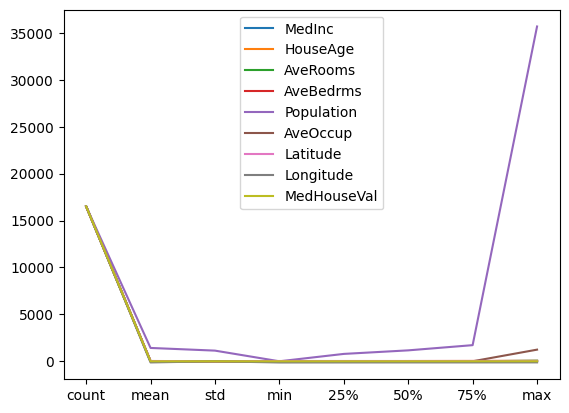

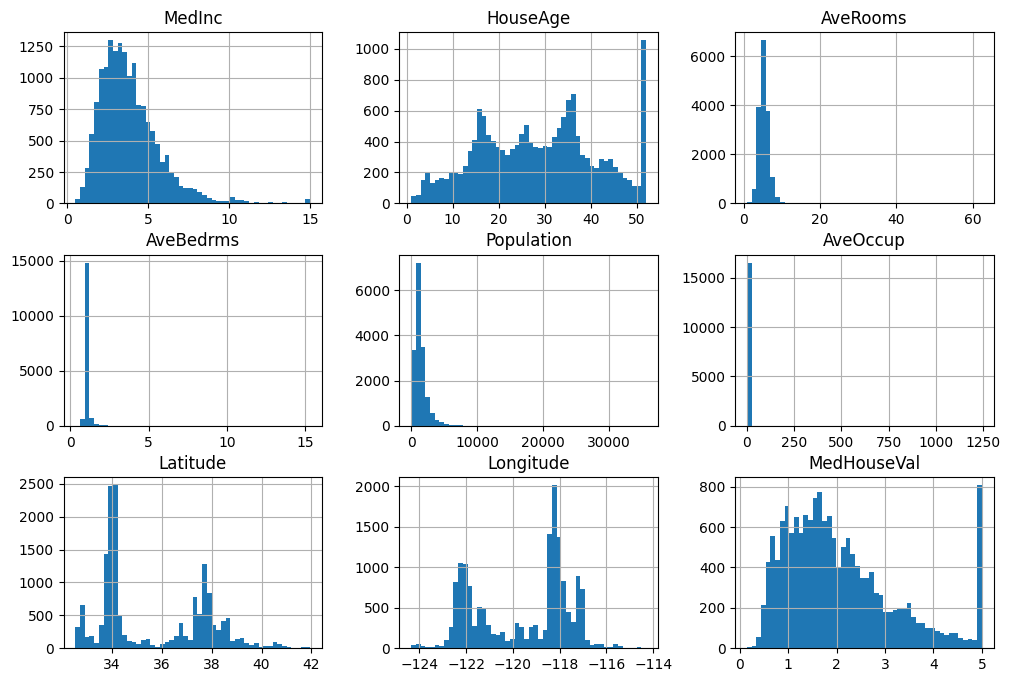

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix




train = pd.read_csv('/Users/oorichaiatias/Downloads/housing_train.csv')
test = pd.read_csv('/Users/oorichaiatias/Downloads/housing_test.csv')
print(train.head())
print('\n' '\n')    

print(train.describe()) 

stats=train.describe()
stats.plot()

train.hist(bins=50, figsize=(12,8))
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

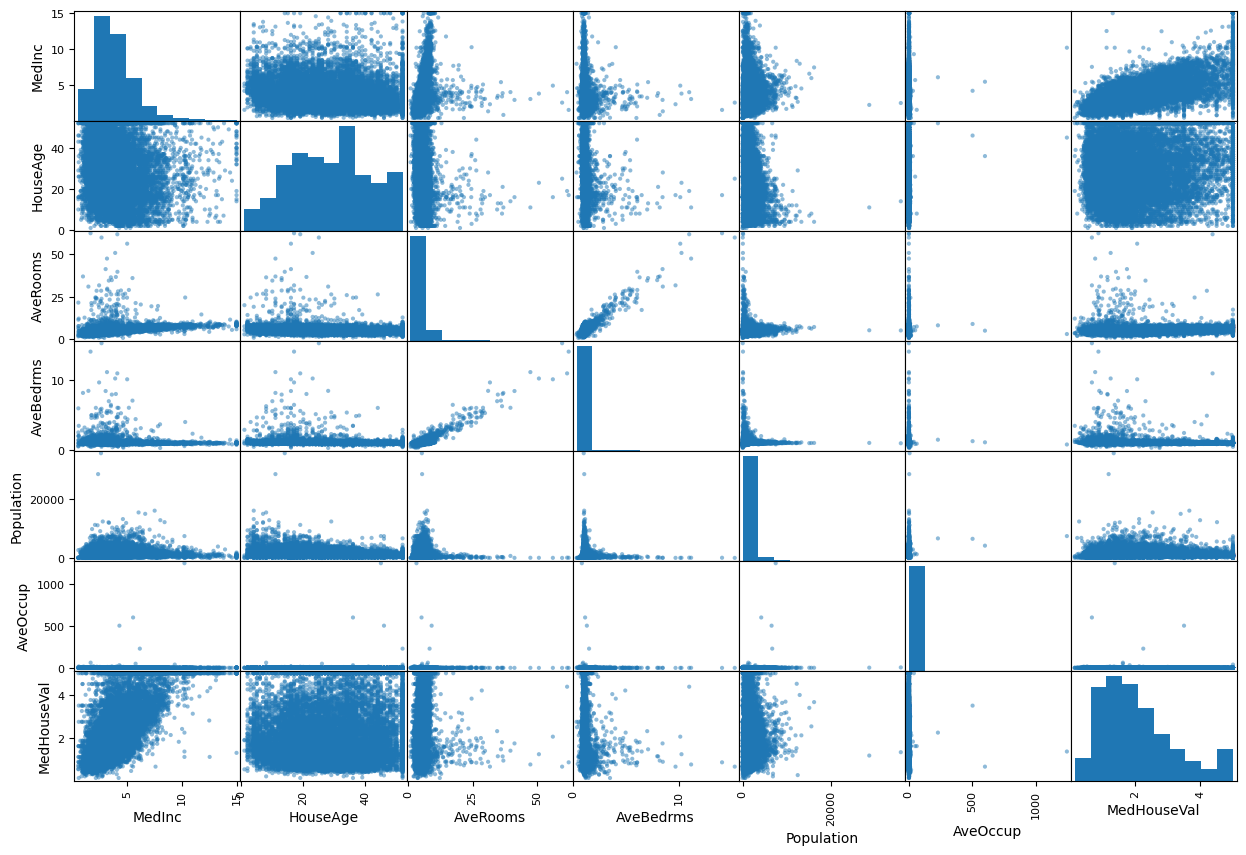

In [7]:
columns=['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','MedHouseVal']
scatter_matrix(train[columns],figsize=(15,10))
plt.show



## Part 3 - Experiments
You could add as many code cells as needed

In [8]:

X_train = train.drop(columns=['MedHouseVal']) 
y_train = train['MedHouseVal']

X_test = test.drop(columns=['MedHouseVal'])   
y_test = test['MedHouseVal']

feature_engineering_options = {
    'no_scaling': None,
    'scaling': StandardScaler()
}

models = {
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42)
}

param_grids = {
    'RandomForestRegressor': {
        'n_estimators': [50, 100],
        'max_depth': [5, 10]
    },
    'GradientBoostingRegressor': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1]
    }
}

results = []


In [15]:
for fe_name, scaler in feature_engineering_options.items():
    for model_name, model in models.items():
        steps = []
        if scaler:
            steps.append(('scaling', scaler))  
        steps.append(('model', model))
        pipeline = Pipeline(steps=steps)
        
        grid_search = GridSearchCV(pipeline, param_grid={'model__' + k: v for k, v in param_grids[model_name].items()},
                                   cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        r2_test = r2_score(y_test, y_pred)
        
        results.append({
            'Feature Engineering': fe_name,
            'Model': model_name,
            'Best Parameters': grid_search.best_params_,
            'Cross-Validation R²': grid_search.best_score_,
            'R² on Test Set': r2_test
        })

results_df = pd.DataFrame(results)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
print(results_df)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


   Feature Engineering                      Model  \
0           no_scaling      RandomForestRegressor   
1           no_scaling  GradientBoostingRegressor   
2              scaling      RandomForestRegressor   
3              scaling  GradientBoostingRegressor   
4           no_scaling      RandomForestRegressor   
5           no_scaling  GradientBoostingRegressor   
6              scaling      RandomForestRegressor   
7              scaling  GradientBoostingRegressor   
8           no_scaling      RandomForestRegressor   
9           no_scaling  GradientBoostingRegressor   
10             scaling      RandomForestRegressor   
11             scaling  GradientBoostingRegressor   
12          no_scaling      RandomForestRegressor   
13          no_scaling  GradientBoostingRegressor   
14             scaling      RandomForestRegressor   
15             scaling  GradientBoostingRegressor   
16          no_scaling      RandomForestRegressor   
17          no_scaling  GradientBoostingRegres

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [10]:
best_pipeline = grid_search.best_estimator_

best_pipeline.fit(X_train, y_train)

y_pred = best_pipeline.predict(X_test)

## Part 5 - Apply on test and show model performance estimation

In [11]:
print("First 5 predictions on the test set:")
for i in range(5):
    print(f"Example {i+1}: Predicted value: {y_pred[i]}, Actual value: {y_test[i]}")
    
    
r2 = r2_score(y_test, y_pred)  
print(f"R^2 on the test set: {r2:.4f}")

First 5 predictions on the test set:
Example 1: Predicted value: 3.247050263449541, Actual value: 3.852
Example 2: Predicted value: 2.4579249115123822, Actual value: 2.457
Example 3: Predicted value: 2.6787895006769613, Actual value: 2.013
Example 4: Predicted value: 1.2293453838823862, Actual value: 1.052
Example 5: Predicted value: 0.9591765966528532, Actual value: 1.078
R^2 on the test set: 0.8002
